In [1]:
import nibabel as nib
from nibabel.processing import resample_to_output
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from glob import glob
import re
import os

seed = 42
np.random.seed(seed)  # for reproducibility
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

In [2]:
data_t1 = np.load("/Dedicated/jmichaelson-sdata/comppsych/lesion/Hackathon_Lesion_Data/t1_np_array.npy")
lables_t1 = np.load("/Dedicated/jmichaelson-sdata/comppsych/lesion/Hackathon_Lesion_Data/t1_labels.npy")

data_array_mask = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_LM_np_array.npy")
labels_array_mask = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_labels.npy")

# data_array_flattened = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_LM_np_array_flattened.npy")
# labels_array = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_labels.npy")
# data_array_flattened_reduced = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_LM_np_array_flattened_reduced.npy")

<IPython.core.display.Javascript object>


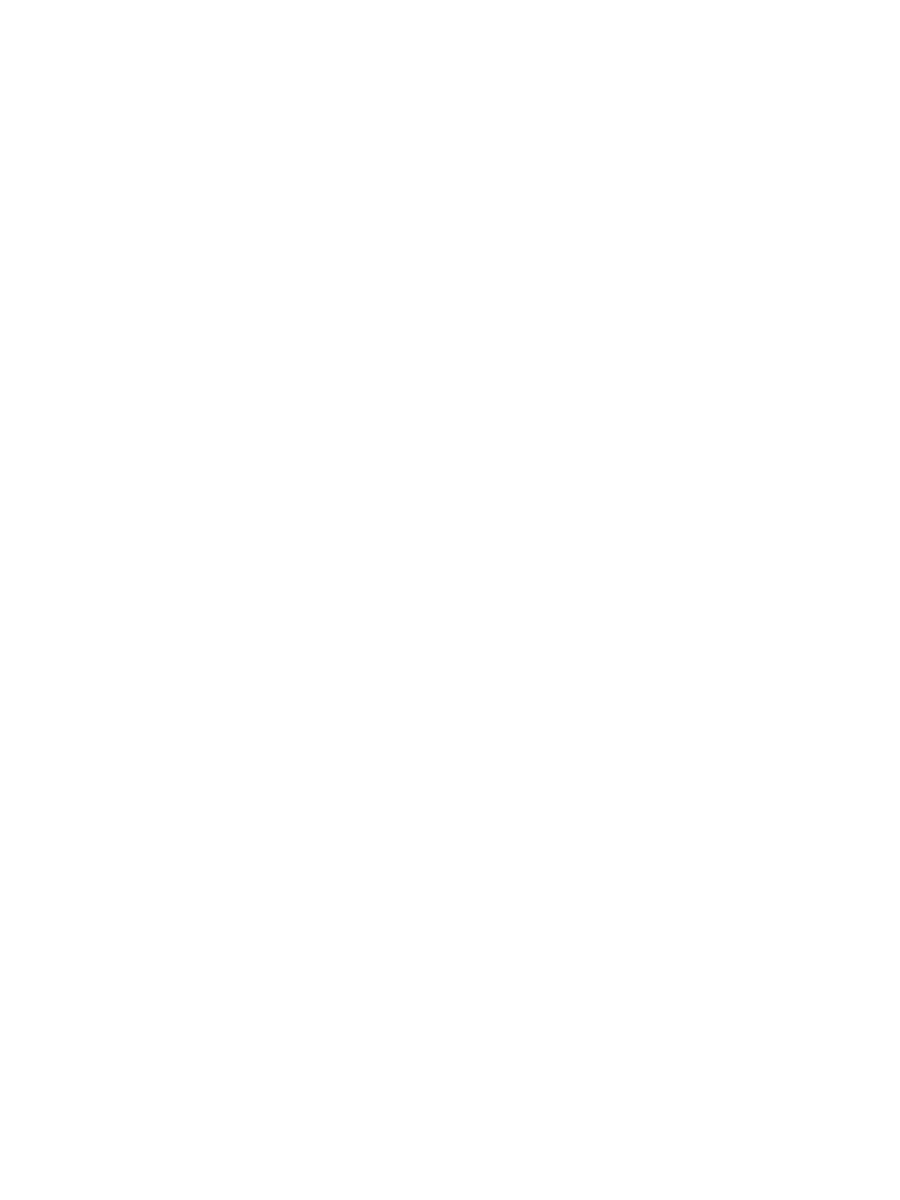

In [3]:
%matplotlib notebook

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.imshow(data_t1[2*i,80,:,:])

<IPython.core.display.Javascript object>


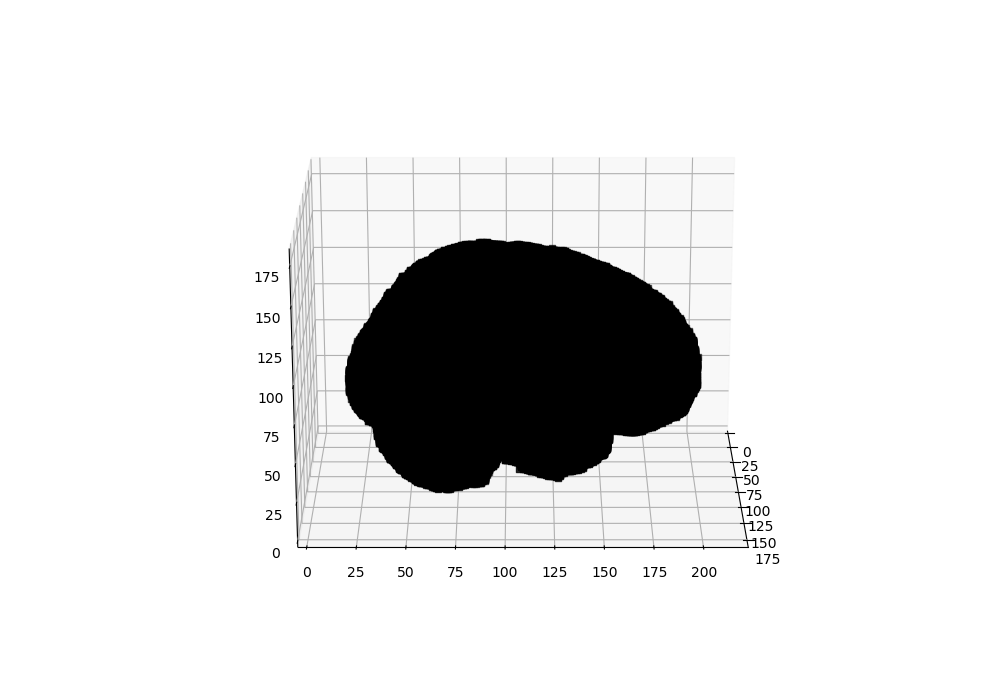

In [24]:
%matplotlib notebook
subject = data_t1[0,:,:,:]
pos = np.where(subject>0)
fig = plt.figure("Subject 0 3D", figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')


ax.scatter(pos[0], pos[1], pos[2], c='black', marker = "s")
ax.set_xlim3d(0, 182)
ax.set_ylim3d(0, 218)
ax.set_zlim3d(0, 182)
ax.view_init(elev=20., azim=0) 
plt.savefig('entire_brain_subject0.png')

<IPython.core.display.Javascript object>


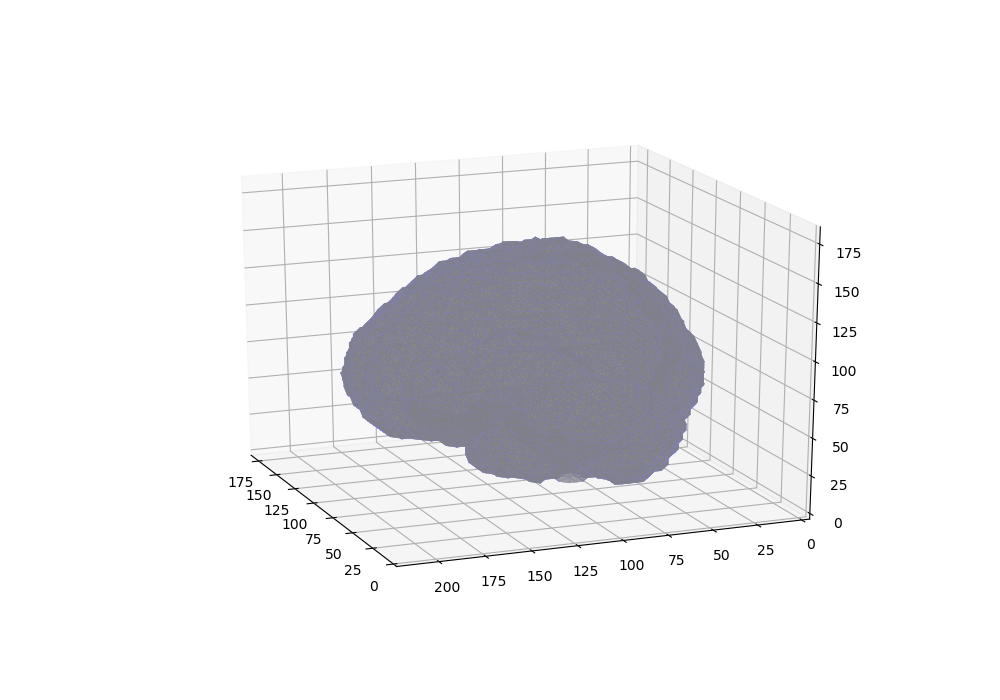

In [17]:
%matplotlib notebook
verts, faces, normals, values = measure.marching_cubes_lewiner(data_t1[0,:,:,:], 0, step_size = 4)
fig = plt.figure("Subject0 brain surface extracted" ,figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
    
def init():
    alpha = 0.2
    fc = "gray"
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha = alpha, facecolor=fc, linewidths=.1)
    edge_color = [.5,.5,1,0.1]
    mesh.set_edgecolor(edge_color)
    ax.add_collection3d(mesh)

    ax.set_xlim3d(0, 182)
    ax.set_ylim3d(0, 218)
    ax.set_zlim3d(0, 182)
    return fig,

def animate(i):
    ax.view_init(elev=20., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('subject0_surface_rotating.gif', fps=30, writer='imagemagick')
plt.show()

In [22]:
from numpy import *    

def get_cube(mask, s=0, e=182, everything=False):
    if everything:
        cube = mask
    else:
        cube = mask[s:e, s:e, s:e]
    flat = cube.flatten()
    positions = np.where(cube > -1)
    return cube, flat, positions

def cutoff(flat, value):
    return np.array([0 if x < value else x for x in flat])

def norm(a):
    if max(a.flatten()) > 2:
        return a / max(a.flatten())
    else: 
        return a / 3

def log_transform(a):
    x = ma.log(a)
    return x.filled(0)

<IPython.core.display.Javascript object>


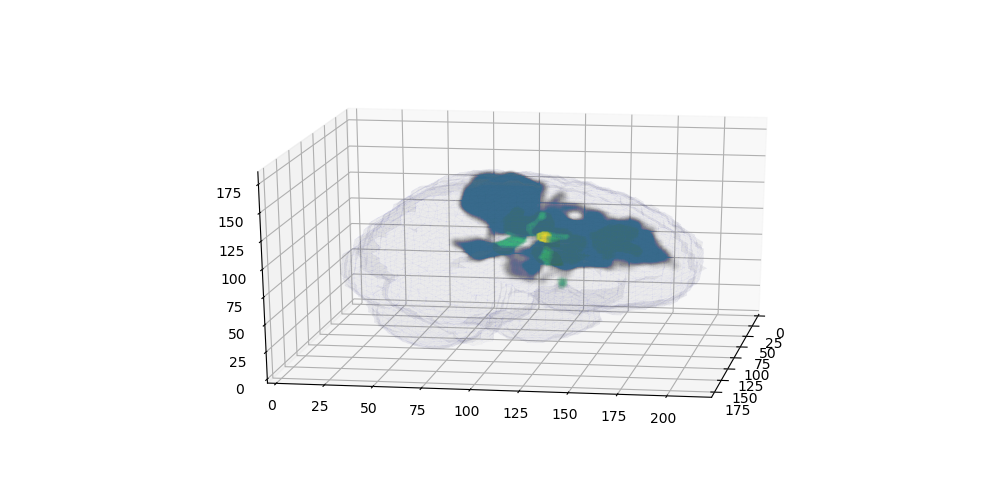

In [23]:
%matplotlib notebook

verts, faces, normals, values = measure.marching_cubes_lewiner(data_t1[0,:,:,:], 0, step_size = 4)
fig = plt.figure("Subject 0 3D", figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for subject in range(1, 10):
    subject_masks = data_array_mask[0:subject,:,:,:].sum(axis=0)
    
    cube,  cube_flat, pos = get_cube(subject_masks, everything = True)
    non_zeroes = cube_flat != 0
    nz_pos = np.apply_along_axis(lambda x: x[non_zeroes], 1, pos)
    nz_cube = cube_flat[non_zeroes]
    nz_cube_norm = norm(nz_cube)
    rgba_colors = cm.viridis(nz_cube_norm)
    rgba_colors[:, 3] = nz_cube_norm**5
    
    alpha = 0.05
    fc = "gray"
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha = alpha, facecolor=fc, linewidths=.1)
    edge_color = [.5,.5,1,0.1]
    mesh.set_edgecolor(edge_color)
    ax.cla()
    ax.add_collection3d(mesh)
    
    ax.view_init(20, subject)
    ax.scatter(nz_pos[0], nz_pos[1], nz_pos[2], color = rgba_colors, marker='s', edgecolors='none')
    ax.set_xlim3d(0, 182)
    ax.set_ylim3d(0, 218)
    ax.set_zlim3d(0, 182)
    fig.canvas.draw()

In [25]:
cm.viridis(0)

(0.267004, 0.004874, 0.329415, 1.0)